In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


While searching through the datasets in the wprdc website, I figured that the Allegheny County Air Quality dataset was a good dataset to manipulate and use to come to conclusions. So in this case, I will be finding the neighborhood with the lowest "Air Quality Index" so I can crown it as the healthiest neighborhood to live in in terms of lung health.

Link to dataset used: https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/4ab1e23f-3262-4bd3-adbf-f72f0119108b?inner_span=True

First, lets import the dataset into this notebook.

In [4]:
Air = pd.read_csv("AQI_Data.csv")

To check if it displays properly, I used Air.head

In [3]:
Air.head(10)

,date,site,parameter,index_value,description,health_advisory,health_effects
0,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
5,2016-01-01,Lincoln,PM10,11,Good,NaN,NaN
6,2016-01-01,South Fayette,SO2,3,Good,NaN,NaN
7,2016-01-01,North Braddock,PM10B,12,Good,NaN,NaN
8,2016-01-01,Parkway East,CO,4,Good,NaN,NaN
9,2016-01-01,Flag Plaza,PM10,7,Good,NaN,NaN


0-50 index is considered Good, 50 - 100 is considered Moderate, 100-130? is considered Unhealthy for sensitive groups

In [3]:
Air['index_value'].mean()

21.731824565193907

The average Air Quality Index Value for all the neighborhoods/sites in Allegheny County is 21.731824565193907.
Anything below that index value is considered better than average air quality relative to the other neigborhoods/sitesin Allegheny County

In [4]:
n = 0
uniq = Air['site'].unique()
for a in uniq:
    n = n + 1
n = str(n)
print("There are " + n + " unique neighborhoods/sites that were recorded")

There are 15 unique neighborhoods/sites that were recorded


We're gonna find out how many times each neighborhood/site was recorded to see if this data can be trusted

In [9]:
AQI = {}
n=0
n1=0
n2=1
for row in Air.iterrows():
    n1 = Air.iloc[n,1] 
    if n1 not in AQI:
        AQI[n1] = n2
    elif n1 in AQI:
        AQI[n1] = AQI[n1] + n2
    n = n+1

AQI

{'Lawrenceville': 4026,
 'Flag Plaza': 4002,
 'Harrison Township': 4806,
 'Avalon': 4054,
 'Lincoln': 3574,
 'South Fayette': 4627,
 'North Braddock': 5763,
 'Parkway East': 7460,
 'Liberty 2': 4906,
 'Lawrenceville 2': 4970,
 'Glassport High Street': 2493,
 'Liberty': 2506,
 'Clairton': 553,
 'West Mifflin': 301,
 'Pittsburgh': 1501}

The most recorded neighborhood/site is Parkway East, while the least recorded neigborhood/site is West Mifflin. West Mifflin was recorded only 301 times, which while being a low number compared to how many times the other sites/neighborhoods were recorded, it is still a substantial amount and should be good enough.

Now, we are gonna add the Air Quality index for each neighborhood/site, then divide by how many times that neighborhood/site has been recorded so we can find the average Air Quality index for said neighborhood/site

In [11]:
Airq = {}
n=0
n1=0
n2=0
for row in Air.iterrows():
    n1 = Air.iloc[n,1]
    n2 = Air.iloc[n,3]
    if n1 not in Airq:
        Airq[n1] = n2
    elif n1 in Airq:
        Airq[n1] = Airq[n1] + n2
    n = n+1




In [15]:
AverageAir = dict((k, float(Airq[k]) / AQI[k]) for k in Airq)




In [17]:
airplot = pd.Series(AverageAir)


In [14]:
airplot

Lawrenceville            38.044213
Flag Plaza                9.949275
Harrison Township        24.340824
Avalon                   22.000493
Lincoln                  35.108002
South Fayette            21.423817
North Braddock           18.175603
Parkway East             21.962064
Liberty 2                32.263351
Lawrenceville 2           3.081087
Glassport High Street    17.186522
Liberty                  18.700718
Clairton                 17.813743
West Mifflin              6.335548
Pittsburgh               26.397069
dtype: float64

Before we proceed, We have to add up Lawrenceville and Lawrenceville 2's Average AQI and divide it by two. This is because there were two measurers placed in Lawrenceville.
Same thing has to be done with Lincoln and Lincoln 2.

In [9]:
law1 = AverageAir["Lawrenceville"]
law2 = AverageAir["Lawrenceville 2"]
average = (law1+law2)/2
AverageAir["Lawrenceville"] = average
del AverageAir["Lawrenceville 2"]


In [10]:
lib1 = AverageAir["Liberty"]
lib2 = AverageAir["Liberty 2"]
averagelib = (lib1+lib2)/2
AverageAir["Liberty"] = average
del AverageAir["Liberty 2"]

In [11]:
AverageAir

{'Lawrenceville': 20.5626495685489,
 'Flag Plaza': 9.94927536231884,
 'Harrison Township': 24.34082397003745,
 'Avalon': 22.0004933399112,
 'Lincoln': 35.10800223838836,
 'South Fayette': 21.42381672790145,
 'North Braddock': 18.175602984556654,
 'Parkway East': 21.96206434316354,
 'Glassport High Street': 17.186522262334538,
 'Liberty': 20.5626495685489,
 'Clairton': 17.81374321880651,
 'West Mifflin': 6.335548172757475,
 'Pittsburgh': 26.397068620919388}

Now, lets find the sites/neighborhoods that have an average AQI below the mean.

In [12]:
new = airplot.drop(airplot.index[9])
new.iloc[0] = average



In [13]:
new1 = new.drop(new.index[8])
new1.iloc[10] = averagelib


In [14]:
goodair = {}
n=0
n1=0
n2=0
mean = Air['index_value'].mean()
value = new1.values
index = new1.index
for item in new1.iteritems():
    if value[n] < mean:
        goodair[index[n]] = value[n]
    n = n + 1
goodair


{'Lawrenceville': 20.5626495685489,
 'Flag Plaza': 9.94927536231884,
 'South Fayette': 21.42381672790145,
 'North Braddock': 18.175602984556654,
 'Glassport High Street': 17.186522262334538,
 'Liberty': 18.70071827613727,
 'West Mifflin': 6.335548172757475}

The sites/neighborhoods with an Air Quality index below the mean of 21.731824565193907 are Flag Plaza, South Fayette, North Braddock, Lawrenceville 2, Glassport High Street, Liberty, Clairton, and West mifflin.

This time we are gonna find the sites/neighborhoods that have an average higher than the mean.

In [15]:
badair = {}
n=0
n1=0
n2=0
mean = Air['index_value'].mean()
value = new1.values
index = new1.index
for item in new1.iteritems():
    if value[n] > mean:
        badair[index[n]] = value[n]
    n = n + 1
badair



{'Harrison Township': 24.34082397003745,
 'Avalon': 22.0004933399112,
 'Lincoln': 35.10800223838836,
 'Parkway East': 21.96206434316354,
 'Clairton': 25.48203463745714,
 'Pittsburgh': 26.397068620919388}

The sites/neighborhoods with an Air Quality Index above the mean of 21.731824565193907 are Lawrenceville, Harrison Township, Avalon, Lincoln, Parkway East, Liberty 2, and Pittsburgh.

Now, its time to single out the site/neighborhood with the lowest average Air Quality Index using some pandas python code.

In [16]:
new1.min()

6.335548172757475

It seems that the lowest Air Quality index is 6.335548172757475. Lets find out what site/neighborhood holds that value

In [17]:
position = new1.argmin()
index = new1.index
index[position]


'West Mifflin'

It turns out West Mifflin has the lowest average Air Quality Index out of all 15 sites/neighborhoods recorded, crowning it the healthiest site/neighborhood to live in in allegheny county in terms of lung health.

Here is a bar graph to visualize this data and compare the site/neighborhoods with eachother easily

Text(0, 0.5, 'Air Quality Index')

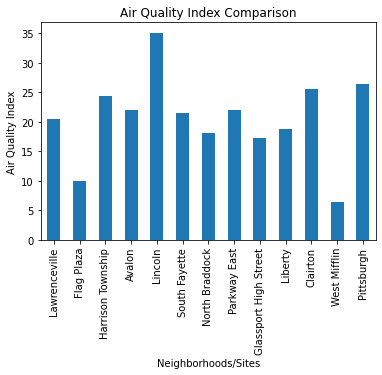

In [85]:
new1.plot(kind='bar')
plt.title("Air Quality Index Comparison")
plt.xlabel("Neighborhoods/Sites")
plt.ylabel("Air Quality Index")